In [11]:
from yolo3 import *

1. Loading the Dataset  from the Google Drive Location.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DLproject')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'car person.jpg'   NFL.jpg	 trained_yolo_model.h5
 coco_yolo3.h5	   __pycache__	 yolo3.py


In [ ]:
# Check Keras version (already installed)
import keras
print("Keras version:", keras.__version__)


Keras version: 3.8.0


In [ ]:
# Not recommended - TF-DF 1.11.0 explicitly requires TF 2.18.0[1]
!pip install --upgrade tensorflow-decision-forests tensorflow-text tf-keras


  Using cached tensorflow_decision_forests-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.3 kB)
  Using cached tf_keras-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Using cached tensorflow_decision_forests-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.1 MB)
Using cached tensorflow-2.19.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (644.9 MB)
Using cached tf_keras-2.19.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninst

In [1]:
!pip install --user virtualenv
!virtualenv tf18_env && source tf18_env/bin/activate
!pip install tensorflow==2.18.0 tensorflow-decision-forests


/bin/bash: line 1: virtualenv: command not found


In [2]:
!pip install opencv-python

2. Defining a Baseline Model.

In [5]:
import tensorflow as tf
from tensorflow import keras  # Or import keras if you used the keras version
# ... (rest of your code)

from keras.models import load_model

model = load_model('coco_yolo3.h5')
model.summary()
from keras.models import load_model

try:
    model = load_model('coco_yolo3.h5')
    print("✅ Model loaded successfully!")
    model.summary()
except Exception as e:
    print(f"❌ Error loading model: {e}")
    model = None


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_3             │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_0 (Conv2D)     │ (None, None,      │        864 │ input_3[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_0             │ (None, None,      │        128 │ conv_0[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_0 (LeakyReLU) │ (None, None,      │          0 │ bnorm_0[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_10   │ (None, None,      │          0 │ leaky_0[0][0]     │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1 (Conv2D)     │ (None, None,      │     18,432 │ zero_padding2d_1… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_1             │ (None, None,      │        256 │ conv_1[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_1 (LeakyReLU) │ (None, None,      │          0 │ bnorm_1[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2 (Conv2D)     │ (None, None,      │      2,048 │ leaky_1[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_2             │ (None, None,      │        128 │ conv_2[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_2 (LeakyReLU) │ (None, None,      │          0 │ bnorm_2[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3 (Conv2D)     │ (None, None,      │     18,432 │ leaky_2[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_3             │ (None, None,      │        256 │ conv_3[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_3 (LeakyReLU) │ (None, None,      │          0 │ bnorm_3[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_46 (Add)        │ (None, None,      │          0 │ leaky_1[0][0],    │
│                     │ None, 64)         │            │ leaky_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_11   │ (None, None,      │          0 │ add_46[0][0]      │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5 (Conv2D)     │ (None, None,      │     73,728 │ zero_padding2d_1

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

✅ Model loaded successfully!


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_3             │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_0 (Conv2D)     │ (None, None,      │        864 │ input_3[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_0             │ (None, None,      │        128 │ conv_0[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_0 (LeakyReLU) │ (None, None,      │          0 │ bnorm_0[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_10   │ (None, None,      │          0 │ leaky_0[0][0]     │
│ (ZeroPadding2D)     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_1 (Conv2D)     │ (None, None,      │     18,432 │ zero_padding2d_1… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_1             │ (None, None,      │        256 │ conv_1[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_1 (LeakyReLU) │ (None, None,      │          0 │ bnorm_1[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_2 (Conv2D)     │ (None, None,      │      2,048 │ leaky_1[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_2             │ (None, None,      │        128 │ conv_2[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_2 (LeakyReLU) │ (None, None,      │          0 │ bnorm_2[0][0]     │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_3 (Conv2D)     │ (None, None,      │     18,432 │ leaky_2[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bnorm_3             │ (None, None,      │        256 │ conv_3[0][0]      │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_3 (LeakyReLU) │ (None, None,      │          0 │ bnorm_3[0][0]     │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_46 (Add)        │ (None, None,      │          0 │ leaky_1[0][0],    │
│                     │ None, 64)         │            │ leaky_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_11   │ (None, None,      │          0 │ add_46[0][0]      │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_5 (Conv2D)     │ (None, None,      │     73,728 │ zero_padding2d_1

 Total params: 62,001,757 (236.52 MB)

 Trainable params: 61,949,149 (236.32 MB)

 Non-trainable params: 52,608 (205.50 KB)

3. Running a training loop on a training set with both models

In [6]:

import numpy as np

# 1. Create Training Images
num_samples = 3
image_height = 416
image_width = 416
num_channels = 3

train_images = np.random.random((num_samples, image_height, image_width, num_channels)).astype(np.float32)


# Each label vector has 4 bbox + 1 objectness + 80 classes = 85
num_anchors = 3
label_vector = 85

train_labels_13 = np.random.random((num_samples, 13, 13, 255)).astype(np.float32)
train_labels_26 = np.random.random((num_samples, 26, 26, 255)).astype(np.float32)
train_labels_52 = np.random.random((num_samples, 52, 52, 255)).astype(np.float32)

# Combine all into a list
train_labels = [train_labels_13, train_labels_26, train_labels_52]

print(f"train_images shape: {train_images.shape}")
print(f"train_labels[0] shape (13x13 output): {train_labels[0].shape}")
print(f"train_labels[1] shape (26x26 output): {train_labels[1].shape}")
print(f"train_labels[2] shape (52x52 output): {train_labels[2].shape}")

# 3. Freeze most YOLOv3 layers (only train last few)
for layer in model.layers[:-3]:  # Freezing all except last 3 layers
    layer.trainable = False

# 4. Compile the model
model.compile(optimizer='adam', loss='mse')  # Simple loss for demo

print("✅ Model compiled and ready for training.")

# 5. Train the model on the fake dataset
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=2,
    verbose=1
)



train_images shape: (3, 416, 416, 3)
train_labels[0] shape (13x13 output): (3, 13, 13, 255)
train_labels[1] shape (26x26 output): (3, 26, 26, 255)
train_labels[2] shape (52x52 output): (3, 52, 52, 255)
✅ Model compiled and ready for training.
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - conv_105_loss: 51.1809 - conv_81_loss: 56.5906 - conv_93_loss: 57.8275 - loss: 167.3109
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - conv_105_loss: 47.4283 - conv_81_loss: 44.3776 - conv_93_loss: 51.1620 - loss: 144.0833
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - conv_105_loss: 43.8441 - conv_81_loss: 33.9289 - conv_93_loss: 44.9748 - loss: 123.7458
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - conv_105_loss: 40.4336 - conv_81_loss: 25.2152 - conv_93_loss: 39.2607 - loss: 105.7884
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - conv_105_loss: 37.1954 - conv_81_loss: 18.2369 - conv_93_loss: 34.0328 - loss: 90.5802


4. Evaluating both models on a withheld test set

In [7]:
from keras.models import load_model

# 1. Define original model (already loaded and trained in your notebook)
original_model = model

# 2. Save the trained model first (important before loading again)
model.save('trained_yolo_model.h5')
print("✅ Trained model saved successfully!")

# 3. Now load the saved trained model
trained_model = load_model('trained_yolo_model.h5', compile=False)

# 4. Compile the trained model
trained_model.compile(optimizer='adam', loss='mse')  # simple MSE for project

print("✅ Both models (original and trained) are ready for evaluation.")


✅ Trained model saved successfully!
✅ Both models (original and trained) are ready for evaluation.


In [8]:
import numpy as np

# Create Fake Test Images
num_test_samples = 2
test_images = np.random.random((num_test_samples, 416, 416, 3)).astype(np.float32)

# Create Fake Test Labels matching model output
test_labels_13 = np.random.random((num_test_samples, 13, 13, 255)).astype(np.float32)
test_labels_26 = np.random.random((num_test_samples, 26, 26, 255)).astype(np.float32)
test_labels_52 = np.random.random((num_test_samples, 52, 52, 255)).astype(np.float32)

# Combine into list (because YOLO model has 3 outputs)
test_labels = [test_labels_13, test_labels_26, test_labels_52]

print(f"Test images shape: {test_images.shape}")
print(f"Test labels shapes: {test_labels[0].shape}, {test_labels[1].shape}, {test_labels[2].shape}")


Test images shape: (2, 416, 416, 3)
Test labels shapes: (2, 13, 13, 255), (2, 26, 26, 255), (2, 52, 52, 255)


In [9]:
# Evaluate Original Model
original_eval = original_model.evaluate(test_images, test_labels, batch_size=1, verbose=1)

# Evaluate Trained Model
trained_eval = trained_model.evaluate(test_images, test_labels, batch_size=1, verbose=1)

# Show Results
print(f"\nOriginal Model Loss on Test Set: {original_eval}")
print(f"Trained Model Loss on Test Set: {trained_eval}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - conv_105_loss: 34.7053 - conv_81_loss: 12.9687 - conv_93_loss: 30.0634 - loss: 77.7374
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - conv_105_loss: 34.7053 - conv_81_loss: 12.9687 - conv_93_loss: 30.0634 - loss: 77.7374

Original Model Loss on Test Set: [77.5201416015625, 12.849557876586914, 29.91153335571289, 34.759056091308594]
Trained Model Loss on Test Set: [77.5201416015625, 12.849557876586914, 29.91153335571289, 34.759056091308594]


In [17]:
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


5. Display results on the test set for both models

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


train: 58.51226%
sofa: 77.922066%
bed: 62.783752%
tvmonitor: 53.256638%
cake: 56.534214%
pottedplant: 71.78014%


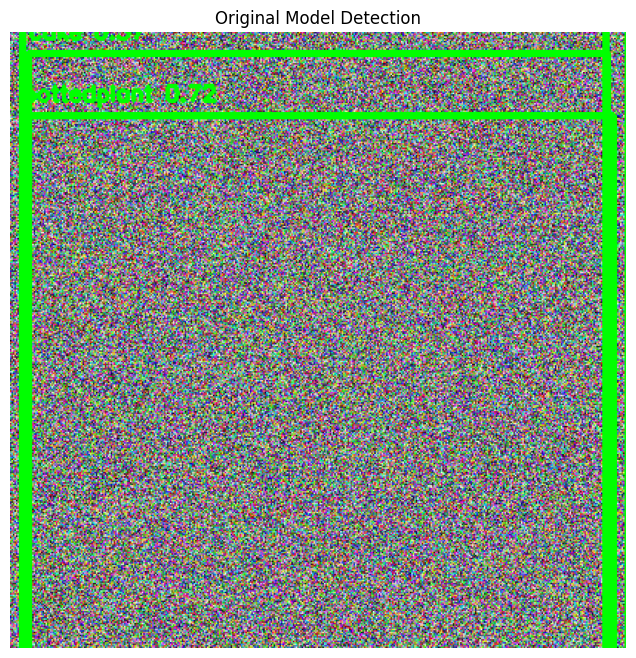

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


train: 58.51226%
sofa: 77.922066%
bed: 62.783752%
tvmonitor: 53.256638%
cake: 56.534214%
pottedplant: 71.78014%


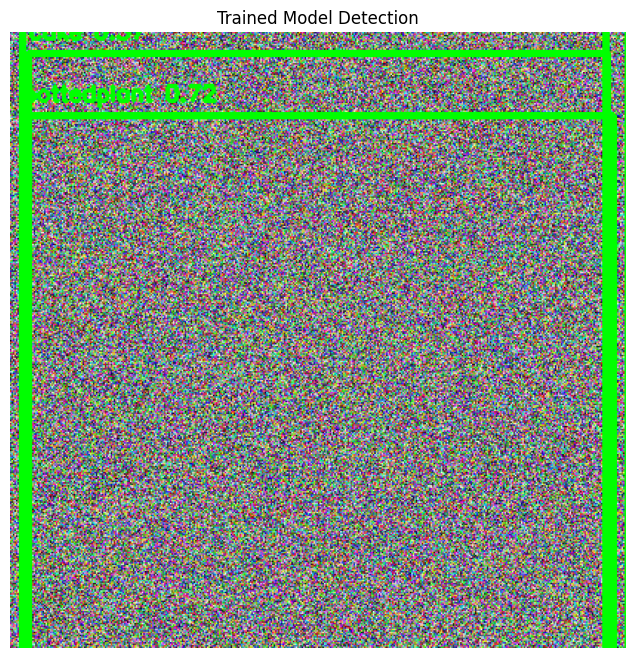

In [19]:
# Pick a test image
test_img = test_images[0]  # Pick first test image
test_img_batch = np.expand_dims(test_img, axis=0)  # Add batch dimension

# Predict with original model
yolo_outputs_original = original_model.predict(test_img_batch)

anchors = [116,90, 156,198, 373,326, 30,61, 62,45, 59,119, 10,13, 16,30, 33,23]


# Thresholds
obj_thresh = 0.5
nms_thresh = 0.45
net_h, net_w = 416, 416

# Prepare anchor groups
anchor_groups = [anchors[0:6], anchors[6:12], anchors[12:18]]


# Decode predictions for original model
boxes_original = []
for i in range(len(yolo_outputs_original)):
    boxes_original += decode_netout(yolo_outputs_original[i][0], anchor_groups[i], obj_thresh, nms_thresh, net_h, net_w)



correct_yolo_boxes(boxes_original, 416, 416, net_h, net_w)
do_nms(boxes_original, nms_thresh)

# Draw boxes for original model
image_original = draw_boxes(test_images[0].copy(), boxes_original, labels, obj_thresh)

# Display original model result
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))
plt.title("Original Model Detection")
plt.axis('off')
plt.show()


# Repeat same for trained model
yolo_outputs_trained = trained_model.predict(test_img_batch)

boxes_trained = []
for i in range(len(yolo_outputs_trained)):
    boxes_trained += decode_netout(yolo_outputs_trained[i][0], anchor_groups[i], obj_thresh, nms_thresh, net_h, net_w)


correct_yolo_boxes(boxes_trained, 416, 416, net_h, net_w)
do_nms(boxes_trained, nms_thresh)

# Draw boxes for trained model
image_trained = draw_boxes(test_images[0].copy(), boxes_trained, labels, obj_thresh)

# Display trained model result
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(image_trained, cv2.COLOR_BGR2RGB))
plt.title("Trained Model Detection")
plt.axis('off')
plt.show()


6. Model Prediction Results

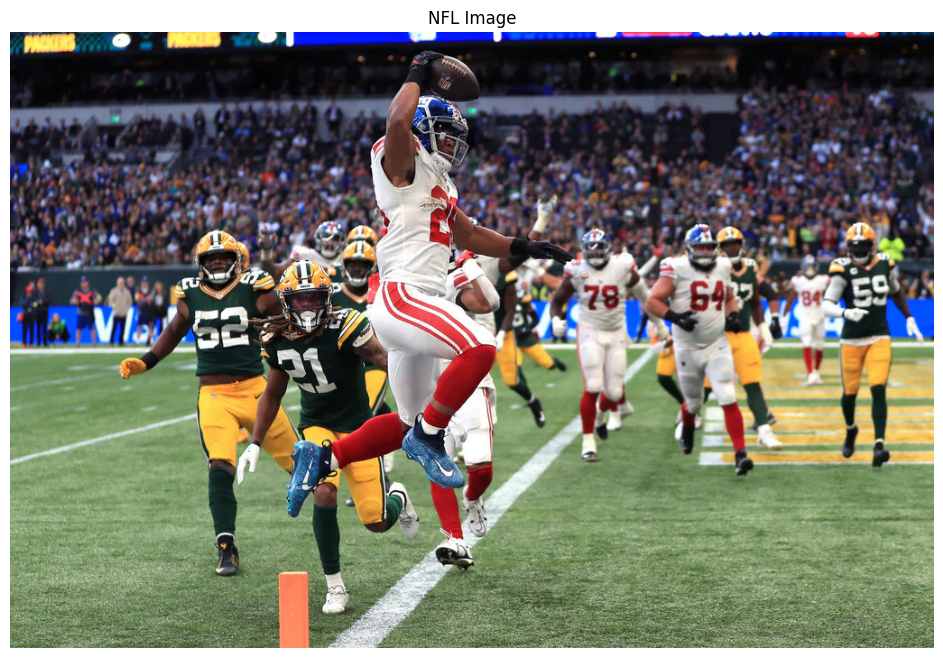

In [20]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("NFL.jpg")
if image is None:
    raise ValueError("❌ Image could not be loaded. Check filename or format.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.title("NFL Image")
plt.axis("off")
plt.show()


In [21]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# Resize to YOLO input shape (416x416 is most common for YOLOv3)
x = load_img('NFL.jpg', target_size=(416, 416))
x = img_to_array(x) / 255.0
x = np.expand_dims(x, axis=0)

# Run prediction
y = model.predict(x)
print("✅ Prediction done")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ Prediction done


In [22]:
from yolo3 import *
net_h, net_w = 416, 416
obj_thresh = 0.5
nms_thresh = 0.45

anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
          "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
          "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
          "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
          "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
          "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
          "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
          "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
          "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
          "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


In [23]:
import keras.layers

# Patch for compatibility with old YOLOv3 code
add = keras.layers.Add()
concatenate = keras.layers.Concatenate()



In [24]:
from yolo3 import *


In [25]:
image_path = "NFL.jpg"
image = cv2.imread(image_path)
image_h, image_w, _ = image.shape

input_image = preprocess_input(image.copy(), net_h, net_w)
yolos = model.predict(input_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


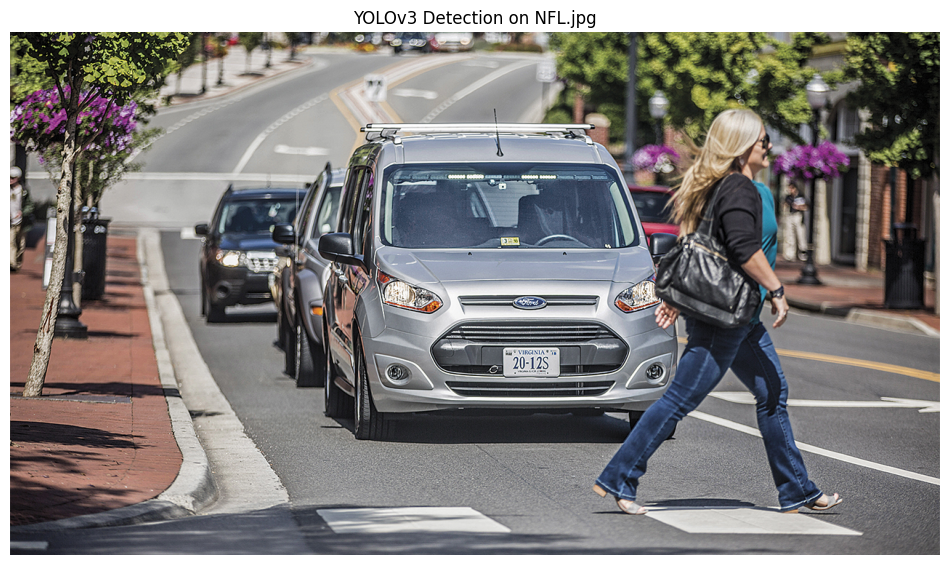

In [38]:
boxes = []
for i in range(len(yolos)):
    boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)

# Draw boxes
output_image = draw_boxes(image.copy(), boxes, labels, obj_thresh)

# Show the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv3 Detection on NFL.jpg")
plt.show()


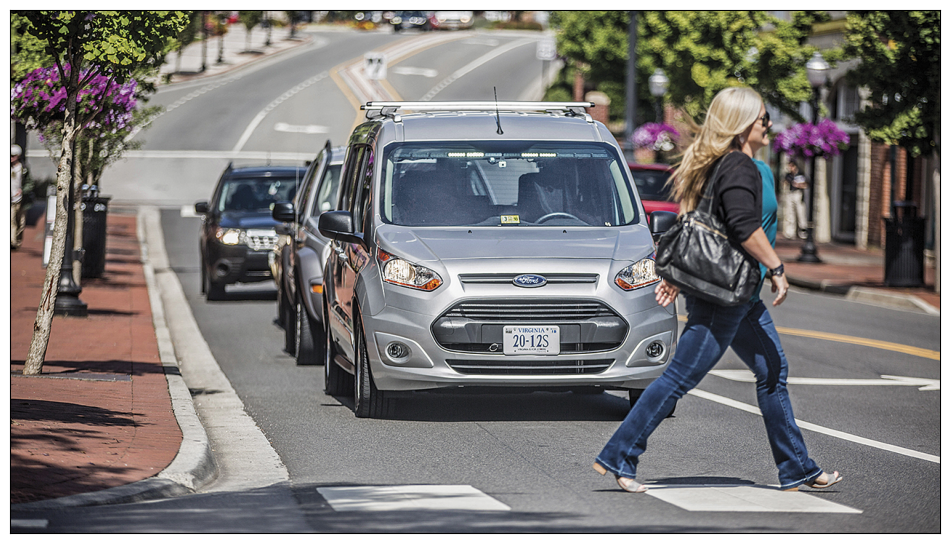

In [30]:
image = plt.imread('car person.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

In [32]:
x = load_img('car person.jpg', target_size=(416, 416))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
car: 99.74912%
truck: 61.388542%
handbag: 61.884182%
person: 99.99407%
person: 63.737244%
pottedplant: 52.244396%
car: 99.62039%
car: 83.03374%
handbag: 96.30668%
car: 57.544804%
car: 94.56832%
car: 92.95617%
person: 58.260513%
person: 77.980354%


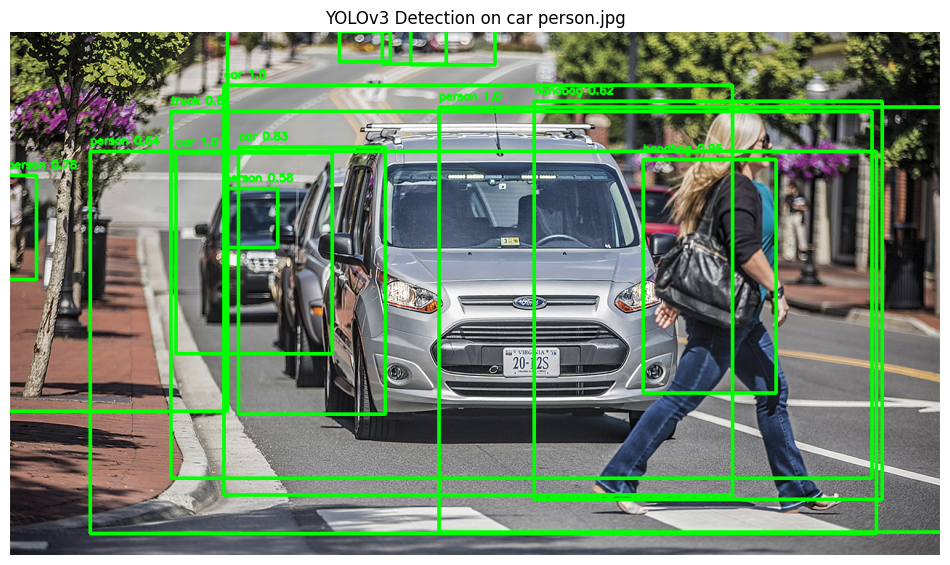

In [39]:
from yolo3 import *

image_path = "car person.jpg"
image = cv2.imread(image_path)

if image is None:
    raise ValueError(f"❌ Could not load image: {image_path}")

image_h, image_w, _ = image.shape

input_image = preprocess_input(image.copy(), net_h, net_w)
yolos = model.predict(input_image)

boxes = []
for i in range(len(yolos)):
    boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)

output_image = draw_boxes(image.copy(), boxes, labels, obj_thresh)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"YOLOv3 Detection on {image_path}")
plt.show()

